# Simple Linear Regression

## Overview


The purpose of linear regression is to find a fit line that describes the data. The following picture shows the data points and a possible fit line to the data.

<img src="img1.png"/>

As we see the fit line is straight-line and of course it can be expressed using the linear equation:

$$\hat{y} = \theta_0 + \theta_1 x_1$$

Using certain techniques based on the data we can find bias ($\theta_0$) and coefficient ($\theta_1$).

## Residual error

The residual error is mean of discrepancies between fit line and actual data point:

$$MSE={\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$$

The objective of linear regression is to minimize the MSE.

Although some scientific libraries contain an API to find a regression, it would be better to know how it is done. It is always good to understand the methods.

## Method

Variance
$$\sigma^2 = \frac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2$$

$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

Covariance
$$cov_{x,y} = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

$$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$$

$$\theta_1=\frac{cov_{x,y}}{\sigma^2}$$

$$\theta_0 = \bar{y} - \theta_1\bar{x}$$

## Measuring accuracy

$$Error = \frac{1}{n}\sum_{j=1}^{n}\mid y_j-\hat{y}_j\mid$$

We need to keep in mind that getting error minimized on training dataset does not guarantee that model works well. Overfitted models perform well on the training set. Proper testing would be to test against unseen data and to see if the error is minimum.

**Overfit** means that model is too overly trained which may capture noise. In this case, it performs well on training data, but it is not generalised well. Simply saying overfit is bad.

Some useful technique: 
<img src="img2.png"/>

## Practice

In [1]:
# import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("1-dataset.csv")
data.head()

,temp,output
0,29.706808,160.534042
1,32.338825,183.694123
2,26.632525,149.162624
3,28.675484,166.377421
4,37.447685,211.238427


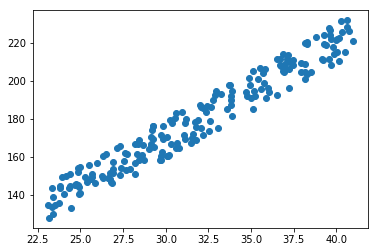

In [3]:
plt.plot(data["temp"], data["output"], 'o')

In [4]:
def mean(A):
    n = len(A)
    S = 0;
    for x in A:
        S = S+x
    return S/n

def variance(A):
    x = A
    n=len(x)
    S = 0
    m = mean(A)
    for xi in x:
        S=S+(xi-m)**2
    return S/(n-1)

def covariance(A,B):
    x=A
    y=B
    n=len(x)
    S=0
    meanX = mean(x)
    meanY = mean(y)
    for i in range(0,n):
        S=S+(x[i]-meanX)*(y[i]-meanY)
    return S/(n-1)

In [6]:
w = covariance(data["temp"], data["output"])/variance(data["temp"])
b = mean(data["output"])-w*(mean(data["temp"]))
def predict(x):
    return b+x*w

In [9]:
reg_x = np.array([25,40,20])
reg_y = predict(reg_x)

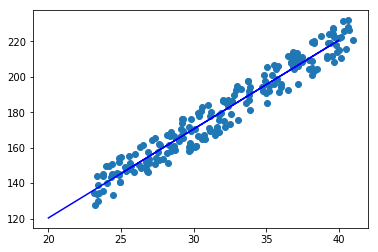

In [14]:
plt.plot(data["temp"], data["output"], 'o', reg_x, reg_y, '-b')

Test with Seaborn

/home/adil/dev/nlpcorpus/nlp-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


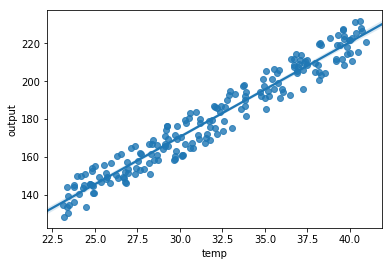

In [11]:
sns.regplot(x=data["temp"], y=data["output"]);